In [2]:
import python_speech_features as psf
import librosa
import numpy as np


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
hop_length = 64
n_fft = 256
f_low_pass = 5000
n_mfcc=10
f_sampling = 8000

In [5]:
fname = '2018_05_05_11_18_17.wav'

In [97]:
signal, f_sampling  = librosa.load(fname)

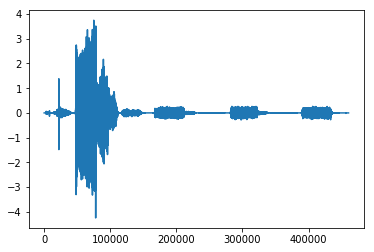

In [98]:
signal[0:150000] = 16*signal[0:150000]
#plt.plot(signal[100000:101010])
plt.plot(signal)

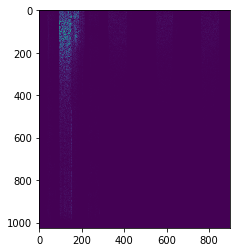

In [71]:
spec_mtx = abs(librosa.spectrum.stft(signal))
plt.imshow(spec_mtx)

In [29]:
spec_mtx.shape

(1025, 900)

In [43]:
norm_vec = abs(spec_mtx).sum(axis=0)
spec_mtx = spec_mtx.dot(np.diag(norm_vec**(-1)))

In [46]:
spec_mtx

array([[  1.26515087e-02,   1.18805105e-02,   1.58950537e-02, ...,
          3.66288088e-02,   4.12901379e-02,   4.11543474e-02],
       [  2.95737037e-03,   9.22849216e-03,   9.12401918e-03, ...,
          1.78859774e-02,   2.17147153e-02,   1.95850525e-02],
       [  8.12063366e-03,   4.43320023e-03,   3.89594410e-04, ...,
          1.27626653e-03,   2.64534191e-03,   1.91157206e-03],
       ..., 
       [  1.01308262e-06,   2.45609340e-06,   9.24232950e-07, ...,
          1.46297907e-06,   1.42198251e-05,   1.08863671e-04],
       [  2.72122315e-06,   1.74115269e-06,   1.46862396e-06, ...,
          5.26067697e-06,   1.95916546e-05,   1.02645638e-04],
       [  9.44903888e-07,   1.47098717e-06,   1.28792499e-06, ...,
          4.33819559e-06,   1.19584329e-05,   9.90047265e-05]], dtype=float32)

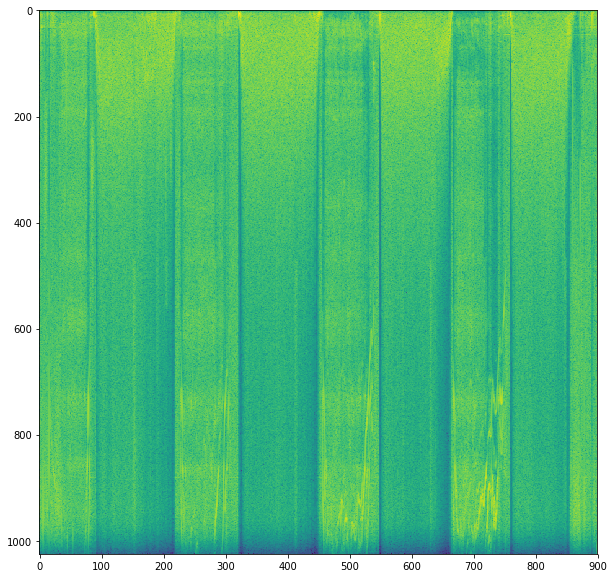

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(spec_mtx[:,:]),aspect = 'auto')

In [82]:
??librosa.feature.mfcc

In [100]:
mfccs = psf.mfcc(signal, appendEnergy=True, lowfreq=100, ceplifter=0, preemph=0)
#mfccs = librosa.feature.mfcc(y=signal)

_Choosing signal representation which is:_

-- amplitude independent;

-- discerns phases clearly;

This is mfcc[1] (not mfcc[0]!!!)


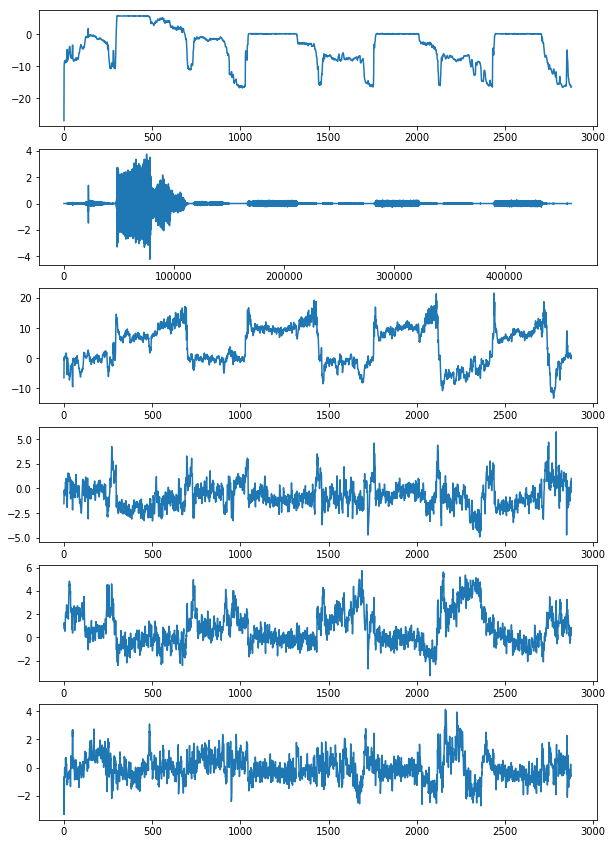

In [101]:
plt.figure(figsize=(10,20))
plt.subplot(811)
plt.plot(mfccs[:,0])
plt.subplot(812)
plt.plot(signal)
plt.subplot(813)
plt.plot(mfccs[:,1])
plt.subplot(814)
plt.plot(mfccs[:,3])
plt.subplot(815)
plt.plot(mfccs[:,4])
plt.subplot(816)
plt.plot(mfccs[:,5])

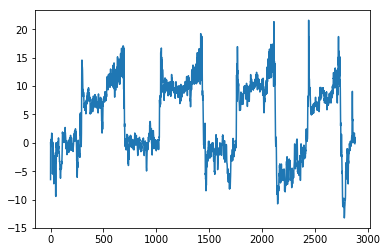

In [103]:
mfccs_1st = mfccs[:,1]
plt.plot(mfccs_1st)

_mfcc[1] has clearly distinct period_

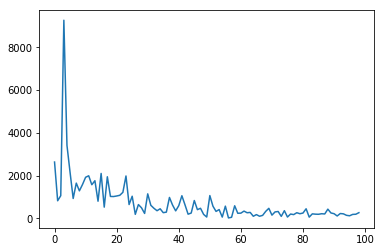

In [170]:
plt.plot(np.abs(np.fft.fft(mfccs_1st))[1:100])


_Period value_

In [174]:
Nfft = mfccs_1st.shape[0] 
fft = np.abs(np.fft.fft(mfccs_1st))[1:100]
P = Nfft/(np.argmax(fft)+1)
P

719.25

_Step matrix determination_

In [160]:
N_step_max = int(5)
step_sizes_sigma= np.empty([N_step_max**2, 2], dtype=int)

cnt=0
for j in range(N_step_max):
    for k in range(N_step_max):        
            step_sizes_sigma[cnt,0] = j+1        
            step_sizes_sigma[cnt,1] = k+1
            cnt+=1

        
    
    
# for j in range(N_step_max):
#     step_sizes_sigma[j,0] = int(0)
#     step_sizes_sigma[j,1] = int(j+1)
#     step_sizes_sigma[j+N_step_max,0] = int(j+1)
#     step_sizes_sigma[j+N_step_max,1] = int(0)
#     step_sizes_sigma[j+2*N_step_max,0] = int(j+1)
#     step_sizes_sigma[j+2*N_step_max,1] = int(j+1)
    
    

step_sizes_sigma

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [5, 1],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 5]])

_Two periods fragment phase initialization_

In [228]:
TwoPeriodsFragment.shape

(2158,)

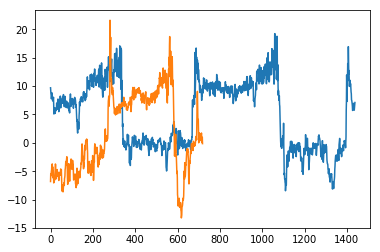

In [229]:
TwoPeriodsFragment = mfccs_1st[int(.5*P):int(2.5*P)] 
TwoPeriodsFragment_phase = np.concatenate([np.arange(0,2*np.pi, 2*np.pi/int(P) ), np.arange(0,2*np.pi, 2*np.pi/int(P) )])
NewFragment = mfccs_1st[-int(P):]

plt.plot(TwoPeriodsFragment)
plt.plot(NewFragment)

_Phase for 1 period long fragment at the end _

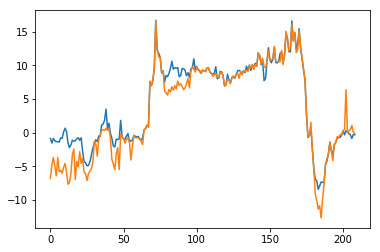

In [230]:
(D, path) = librosa.core.dtw(TwoPeriodsFragment, NewFragment, subseq=True, step_sizes_sigma=step_sizes_sigma)
path1_rev =  list(path[:,0])
path1_rev.reverse() 
path2_rev =  list(path[:,1])
path2_rev.reverse() 

                
plt.plot(TwoPeriodsFragment[path1_rev])
plt.plot(NewFragment[path2_rev])

_phase for NewFragment points who survived dtw (pinpoints)

In [231]:
path

array([[1153,  718],
       [1151,  715],
       [1147,  710],
       [1142,  706],
       [1141,  701],
       [1140,  700],
       [1139,  695],
       [1135,  690],
       [1134,  685],
       [1133,  683],
       [1132,  679],
       [1131,  674],
       [1130,  669],
       [1129,  664],
       [1128,  661],
       [1126,  656],
       [1125,  651],
       [1124,  646],
       [1122,  641],
       [1120,  640],
       [1115,  635],
       [1114,  630],
       [1113,  625],
       [1112,  620],
       [1111,  615],
       [1110,  610],
       [1109,  605],
       [1108,  600],
       [1105,  597],
       [1103,  593],
       [1098,  591],
       [1094,  589],
       [1090,  585],
       [1085,  583],
       [1080,  581],
       [1077,  580],
       [1073,  578],
       [1069,  576],
       [1064,  575],
       [1062,  574],
       [1057,  573],
       [1052,  571],
       [1048,  569],
       [1046,  568],
       [1041,  566],
       [1037,  565],
       [1032,  561],
       [1027,

In [232]:
NewFragment_pinpoints = path2_rev
NewFragment_pinpoints_phase  = [   TwoPeriodsFragment_phase[j] for j in path1_rev   ] 

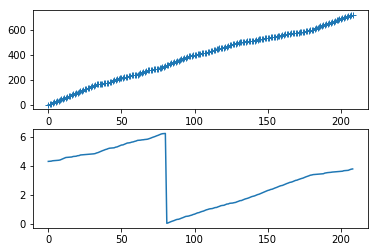

In [233]:
#plt.plot(NewFragment_pinpoints, NewFragment_pinpoints_phase,'+')
plt.subplot(211)
plt.plot(NewFragment_pinpoints,'+')
plt.subplot(212)
plt.plot(NewFragment_pinpoints_phase)

In [213]:
NewFragment_pinpoints_phase

[0.0,
 0.043693917296102822,
 0.069910267673764515,
 0.11360418496986734,
 0.15729810226597016,
 0.19225323610285242,
 0.23594715339895522,
 0.27090228723583748,
 0.30585742107271974,
 0.34955133836882257,
 0.39324525566492541,
 0.43693917296102824,
 0.48063309025713102,
 0.5243270075532338,
 0.55928214139011612,
 0.60297605868621895,
 0.64666997598232179,
 0.69036389327842462,
 0.73405781057452746,
 0.77775172787063018,
 0.82144564516673302,
 0.86513956246283585,
 0.90883347975893869,
 0.95252739705504152,
 0.98748253089192373,
 1.0311764481880266,
 1.0748703654841294,
 1.1185642827802322,
 1.1622582000763351,
 1.2059521173724379,
 1.2321684677500995,
 1.2758623850462023,
 1.3195563023423051,
 1.363250219638408,
 1.4069441369345108,
 1.4418992707713931,
 1.485593188067496,
 1.5292871053635988,
 1.5642422392004811,
 1.5991973730373632,
 1.6341525068742455,
 1.6778464241703483,
 1.6953239910887894,
 1.7390179083848922,
 1.765234258762554,
 1.8001893925994363,
 1.8264057429770979,
 1.861